# Sobre el mensaje en la visualización de datos

Un aspecto relevante para la visualización consiste en seleccionar el tipo de gráfico que represente mejor los datos que queremos representar. Es decir, necesitamos un gráfico que permita "explicar" los datos que tenemos y no unos datos que necesiten ser adaptados para convertirse en un gráfico.

Como observas en la siguiente gráfica, la visualización de datos hace parte de la ciencia de datos, como un paso final para comunicar y explicar los resultados de los análisis realizados.

```{figure} https://upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Data_visualization_process_v1.png/800px-Data_visualization_process_v1.png
---
width: 600px
align: center
name: directive-fig
---
[Farcaster](https://en.wikipedia.org/wiki/User:Farcaster), "Data visualization process v1", en [Wikipedia](https://es.m.wikipedia.org/wiki/Archivo:Data_visualization_process_v1.png), 2014. [CC BY-SA 3.0](https://creativecommons.org/licenses/by-sa/3.0/deed.es)
```

Por otra parte, un gráfico puede ayudar a hacer más clara la información, pero también existe el riesgo de crear representaciones ambiguas que en realidad ocultan lo que puede ser mostrado con los datos[^footnote1]. En este sentido debemos comprender que la forma, figuras y colores que usamos para nuestras visualizaciones tienen una finalidad comunicativa, no meramente estética.

Voy a dar un ejemplo sumamente evidente para que podamos tener clara esta idea. Con los datos que he manipulado sobre casos de Covid-19 durante el primer semestre de 2022, puedo hacer la siguiente gráfica:

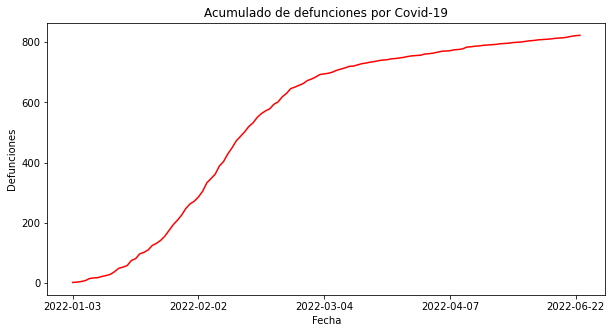

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
muestra_covid = pd.read_csv('../data/covid_clean.csv')
covid_acumulado = muestra_covid.groupby('fecha_def').size().cumsum()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(covid_acumulado.index, covid_acumulado.values, color='red')
ax.set_title('Acumulado de defunciones por Covid-19')
ax.set_xlabel('Fecha')
ax.set_ylabel('Defunciones')
# x labels just months
ax.set_xticks(covid_acumulado.index[::30])

plt.show()

"Técnicamente", esta es una gráfica con datos correctos. Que muestra el acumulado de los casos por Covd-19 que se han presentado durante el semestre. Sin embargo, es una gráfica que envía un mensaje cláramente erróneo: que las defunciones han ido aumentando durante todo el primer semestre de 2022. Una gráfica de este tipo podría utilizarse para tratar de enviar el mensaje de que la pandemia no solo continúa, sino que está agravándose con el paso del tiempo.

Ahora veamos una gráfica del mismo tipo, con los mismos datos, pero representada de una forma diferente:

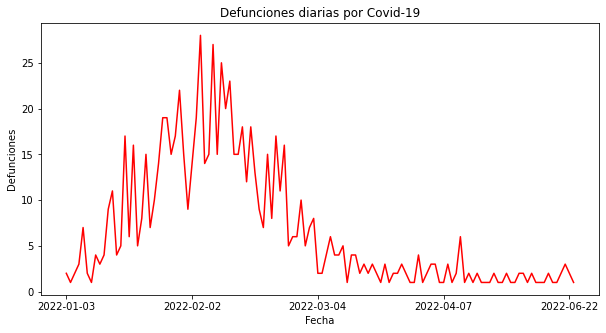

In [2]:
covid_diario =  muestra_covid.groupby('fecha_def').size()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(covid_diario.index, covid_diario.values, color='red')
ax.set_title('Defunciones diarias por Covid-19')
ax.set_xlabel('Fecha')
ax.set_ylabel('Defunciones')
# x labels just months
ax.set_xticks(covid_diario.index[::30])

plt.show()

Son los mismos datos, pero tratados de manera diferente. Mientras la primera figura mostraba una información acumulada, en la segunda se muestra la información de defunciones por día. Ambas gráficas son reales, puesto que en el primer semestre de 2022 murieron más de 800 personas, de acuerdo con esta fuente de datos; pero en la segunda es mucho más claro el **comportamiento temporal** de la pandemia.

Ahora, ¿qué opinas de la siguiente gráfica?

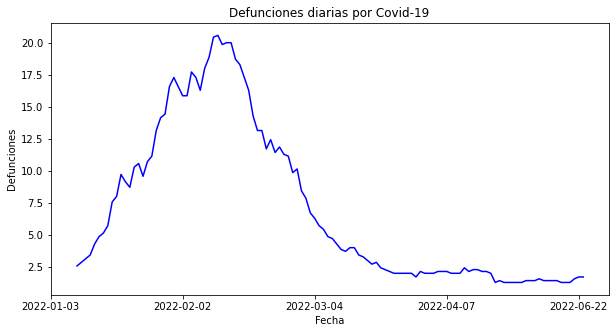

In [3]:
# smooth line
covid_diario_smooth = covid_diario.rolling(7).mean()
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.plot(covid_diario_smooth.index, covid_diario_smooth.values, color='blue')
ax.set_title('Defunciones diarias por Covid-19')
ax.set_xlabel('Fecha')
ax.set_ylabel('Defunciones')
# x labels just months
ax.set_xticks(covid_diario_smooth.index[::30])

plt.show()

Esta gráfica es una versión "suavizada" de la anterior. En este caso, se ha utilizado una técnica de suavizado de datos, que consiste en promediar los datos de una serie de tiempo para reducir la variabilidad de los datos. En este caso, se ha utilizado un promedio móvil de 7 días, lo que significa que se ha promediado cada dato con los 6 días anteriores y los 6 días posteriores. La gráfica sigue siendo precisa, sin brindar un mensaje engañoso, pero es mucho más fácil de leer y comunicar.

En este sentido, es fundamental tener el suficiente criterio para elegir la forma en la que queremos representar los datos. Si estamos interesados en publicar nuestra gráfica en una revista científica es evidente que optaremos por representaciones más precisas, como la segunda gráfica; en tanto que si queremos presentar nuestros resultados a un público más amplio preferiremos una gráfica como la anterior. Y, en ningún caso, deberíamos intentar modificar la visualización para que se ajusten en nuestro "mensaje".

## Un famoso ejemplo de manipulación de datos

El 10 de septiembre de 2013, el CEO de Apple, Tim Cook, presentó una gráfica en la que se mostraba el crecimiento acumulado en las ventas de iPhones desde 2007 hasta 2013. Por motivos de derechos de autor no puedo incluir la imagen en este sitio, pero les comparto la grabación de [la charla de Tim Cook](https://youtu.be/yBX-KpMoxYk?t=1247). El enlace inicia en el segundo exacto en el que se presenta la gráfica.

Como verás, la gráfica es usada solamente por unos segundos, pero tiene el propósito claro de ratificar el argumento que Cook está presentando: que el iPhone 5s fue el modelo más exitoso en su primer año de todos los demás modelos lanzados previamente.

Al ser utilizada por un tiempo tan breve, tiene un efecto directo entre los asistentes. Pero, llamó la atención de David Yanofsky, un periodista afiliado con la revista "Quartz", quien notó algunos aspectos extraños de la gráfica.

En primer lugar, le llamó la atención que la gráfica no tuviese ninguna escala en el eje 'y'. Así, podría ser un volumen de miles, millones, estar en una escala logarítmica... Básicamente cualquier escala pudo ser utilizada.

Pero más que lo anterior, lo que generó mayor ruido fue que al mostrar una gráfica acumulativa, se estaba ocultando, de manera deliberada o no, el comportamiento de las ventas trimestrales. Con los mismos datos, Yanofsky realizó una gráfica de las ventas trimestrales y la sobrepuso a la original de Cook, el resultado lo puedes ver en este [enlace](https://i.kinja-img.com/gawker-media/image/upload/q_75,w_940,h_571,c_fill/d032839e447dca8750f6c32c4e9e26c4.JPG).

La conclusión que pudo extraer Yanofsky de los datos era radicalmente diferente de la que Cook quería transmitir: "aunque Apple pueda acumular más de 400 millones de ventas de iPhones en el tiempo, sus ventas trimestrales del producto han decaido a lo largo de los últimos tres trimestres." {cite}`yanofsky_chart_2013`

Este ejemplo es apenas uno de los innumerables casos en los que las visualizaciones ayudan a ocultar o manipular el mensaje que se está intentando transmitir. La facilidad con la que se puede malintepretar una visualización, conlleva a una desconfianza generalizada en los datos, lo que puede ser un problema grave para la ciencia y la educación. Por esta razón, tener las herramientas para identificar una "buena" de una "mala" visualización es clave en el mundo de hoy.

Finalmente, para cerrar esta sección, les quiero recomendar el ciclo de grabaciones del curso "Calling Bullshit in the Age of Big Data", impartido por los profesores Carl Bergstrom y Jevin West, de la universidad de Washington. Pueden verlo en [YouTube](https://youtube.com/playlist?list=PLPnZfvKID1Sje5jWxt-4CSZD7bUI4gSPS). En este encontrarán muchos ejemplos del "uso indebido" de las visualizaciones y de los datos, así como las herramientas para identificarlos.

## Notas

[^footnote1]: Los cuatro primeros capítulos de {cite}`spiegelhalter_art_2021` son una excelente guía para evitar confundir con los datos desde el mismo proceso de análisis.